In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("Feature_Engineered_with_Outliers.csv")

In [11]:
df1 = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 
          'month', 'duration', 'campaign', 'previous', 'balance_status', 'age_group']]

In [12]:
df1 = pd.get_dummies(df1, dtype=int)

In [13]:
df1

,age,balance,month,duration,campaign,previous,age_group,job_admin,job_blue-collar,job_entrepreneur,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,balance_status_high,balance_status_low,balance_status_medium,balance_status_negative,balance_status_very high
0,58,2143,5,4.35,1,0,50,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,44,29,5,2.52,1,0,40,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,33,2,5,1.27,1,0,30,0,0,1,...,0,0,1,0,1,0,1,0,0,0
3,47,1506,5,1.53,1,0,40,0,1,0,...,0,0,1,1,0,1,0,0,0,0
4,33,1,5,3.30,1,0,30,0,0,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,51,825,11,16.28,3,0,50,0,0,0,...,0,1,0,1,0,1,0,0,0,0
43260,71,1729,11,7.60,2,0,70,0,0,0,...,0,1,0,1,0,1,0,0,0,0
43261,72,5715,11,18.78,5,3,70,0,0,0,...,0,1,0,1,0,0,0,0,0,1
43262,57,668,11,8.47,4,0,50,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# select the relevant features for clustering
X = df[['age', 'balance', 'duration']]

# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# set the number of clusters
k = 3

# train the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# predict the cluster labels
labels = kmeans.predict(X_scaled)

# add the cluster labels to the original dataset
df['cluster'] = labels

C:\Users\Karan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


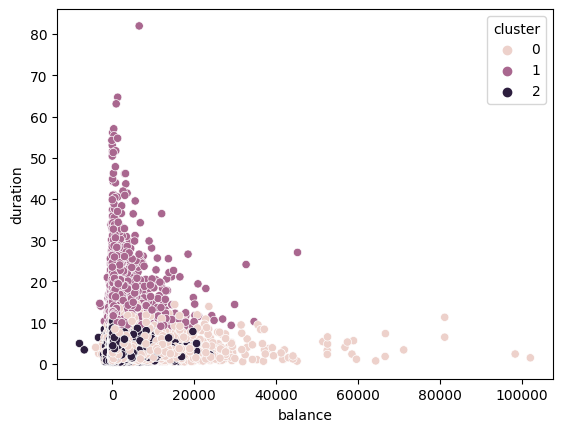

In [5]:
sns.scatterplot(data=df, x='balance', y='duration', hue='cluster')
plt.show()

               age      balance   duration
cluster                                   
0        52.483157  2045.127412   3.401234
1        39.865056  1463.432650  14.776713
2        34.139876   938.867904   3.409931


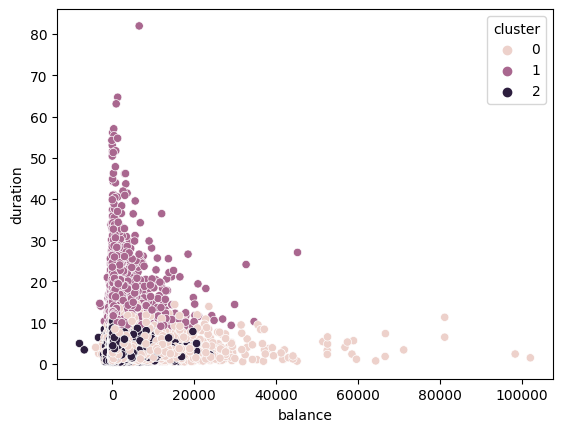

In [6]:
# analyze the properties of clusters
df['cluster'] = kmeans.predict(X_scaled)
cluster_props = df.groupby('cluster')[['age', 'balance', 'duration']].mean()
print(cluster_props)

# visualize the clusters
sns.scatterplot(data=df, x='balance', y='duration', hue='cluster')
plt.show()

In [8]:
df.groupby('cluster')[['age', 'balance', 'duration']].describe().T

cluster                     0             1             2
age      count   14873.000000   4098.000000  24293.000000
         mean       52.483157     39.865056     34.139876
         std         7.271774      9.536390      5.207108
         min        27.000000     20.000000     18.000000
         25%        47.000000     33.000000     31.000000
         50%        52.000000     38.000000     34.000000
         75%        57.000000     46.000000     38.000000
         max        95.000000     89.000000     49.000000
balance  count   14873.000000   4098.000000  24293.000000
         mean     2045.127412   1463.432650    938.867904
         std      4415.829893   2771.995969   1722.838818
         min     -4057.000000  -3058.000000  -8019.000000
         25%       124.000000    106.000000     49.000000
         50%       661.000000    550.000000    357.000000
         75%      2169.000000   1624.000000   1081.000000
         max    102127.000000  45248.000000  23878.000000
duration count   14873.000000   4098.000000  24293.000000
         mean        3.401234     14.776713      3.409931
         std         2.243590      5.894581      2.060754
         min         0.500000      8.600000      0.500000
         25%         1.720000     10.850000      1.800000
         50%         2.770000     12.980000      2.920000
         75%         4.530000     16.850000      4.600000
         max        15.200000     81.970000     10.370000

In [9]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan,balance_status,age_group,cluster
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0,very high,50,0
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0,low,40,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1,low,30,2
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0,high,40,0
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0,low,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0,high,50,1
43260,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0,high,70,0
43261,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0,very high,70,1
43262,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0,medium,50,0


In [153]:
cluster0=df[['age', 'balance', 'duration','deposit']][df['cluster']==0]

In [154]:
cluster1=df[['age', 'balance', 'duration','deposit']][df['cluster']==1]

In [155]:
cluster2=df[['age', 'balance', 'duration','deposit']][df['cluster']==2]

In [156]:
cluster0['deposit'].value_counts(normalize=True)

no     0.876775
yes    0.123225
Name: deposit, dtype: float64

In [157]:
cluster0['deposit'].value_counts()

no     13768
yes     1935
Name: deposit, dtype: int64

In [158]:
cluster1['deposit'].value_counts(normalize=True)

no     0.846861
yes    0.153139
Name: deposit, dtype: float64

In [159]:
cluster1['deposit'].value_counts()

no     1106
yes     200
Name: deposit, dtype: int64

In [143]:
cluster2['deposit'].value_counts(normalize=True)

no     0.919113
yes    0.080887
Name: deposit, dtype: float64

In [160]:
cluster2['deposit'].value_counts()

no     23105
yes     3150
Name: deposit, dtype: int64

In [145]:
cluster1.describe()

,age,balance,duration
count,4098.000000,4098.000000,4098.000000
mean,39.865056,1463.432650,14.776713
std,9.536390,2771.995969,5.894581
min,20.000000,-3058.000000,8.600000
25%,33.000000,106.000000,10.850000
50%,38.000000,550.000000,12.980000
75%,46.000000,1624.000000,16.850000
max,89.000000,45248.000000,81.970000


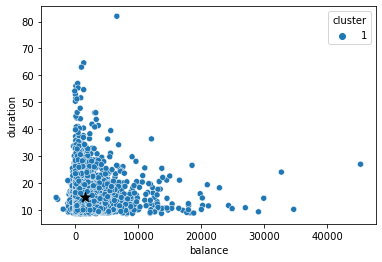

In [129]:
sns.scatterplot(data=df[df['cluster']==1], x='balance', y='duration', hue='cluster')
# plot the centroids for each cluster

centroid = kmeans.cluster_centers_[1]
# reshape the centroid to a 2D array with a single row
centroid = np.reshape(centroid, (1, -1))

# pass the reshaped centroid to scaler.inverse_transform()
centroid = scaler.inverse_transform(centroid)

plt.scatter(centroid[0][1], centroid[0][2], s=100, marker='*', c='black')
plt.show()

In [130]:
centroid

array([[  39.85599415, 1461.65935673,   14.76891082]])

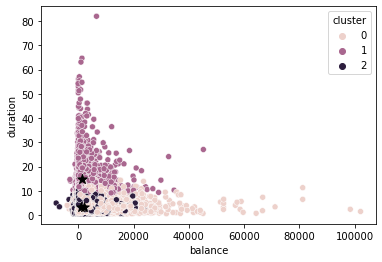

In [133]:
sns.scatterplot(data=df, x='balance', y='duration', hue='cluster')
# plot the centroids for each cluster
plt.scatter(centroids[:, 1], centroids[:, 2], s=100, marker='*', c='black')
for i, txt in enumerate(range(k)):
    plt.annotate('Cluster {}'.format(txt), (centroids[i, 0], centroids[i, 1]))
plt.show()

In [ ]:
kmeans

In [25]:
# transform the centroids to the original scale
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

In [26]:
centroids

array([[  52.48255931, 2040.62557968,    3.40128839],
       [  39.85599415, 1461.65935673,   14.76891082],
       [  34.13582637,  941.52328982,    3.40840987]])

In [43]:
kmeans.cluster_centers_[2]

array([-0.64208048, -0.1396853 , -0.2500424 ])

In [202]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# select the relevant features for clustering
X = df[['age', 'balance']]

# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# set the number of clusters
k = 5

# train the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# predict the cluster labels
labels = kmeans.predict(X_scaled)

# add the cluster labels to the original dataset
df['cluster'] = labels

C:\Users\KARAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
import warnings
warnings.filterwarnings('ignore')

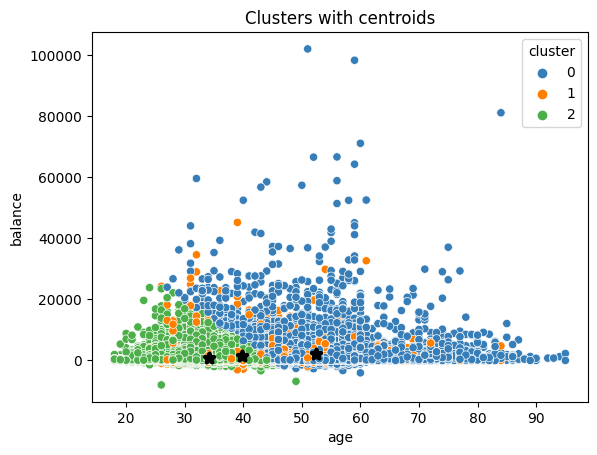

In [10]:
# visualize the clusters
sns.scatterplot(data=df, x='age', y='balance', hue='cluster', palette=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628'])
# Plot the centroids with darker and bigger markers
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50, linewidths=3, color='black', zorder=4)
plt.title("Clusters with centroids")
plt.show()

In [12]:
df_deposit=df[df['deposit']=='yes']

In [13]:
df_deposit

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan,balance_status,age_group,cluster
80,59,admin,married,secondary,no,2343,yes,no,5,17.37,1,0,yes,1,0,1,0,very high,50,1
83,56,admin,married,secondary,no,45,no,no,5,24.45,1,0,yes,1,0,0,0,low,50,1
84,41,technician,married,secondary,no,1270,yes,no,5,23.15,1,0,yes,1,0,1,0,high,40,1
125,55,services,married,secondary,no,2476,yes,no,5,9.65,1,0,yes,1,0,1,0,very high,50,0
164,54,admin,married,tertiary,no,184,no,no,5,11.22,2,0,yes,1,0,0,0,low,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43257,73,retired,married,secondary,no,2850,no,no,11,5.00,1,8,yes,1,0,0,0,very high,70,0
43258,25,technician,single,secondary,no,505,no,yes,11,6.43,2,0,yes,1,0,0,1,medium,20,2
43259,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0,high,50,1
43260,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0,high,70,0


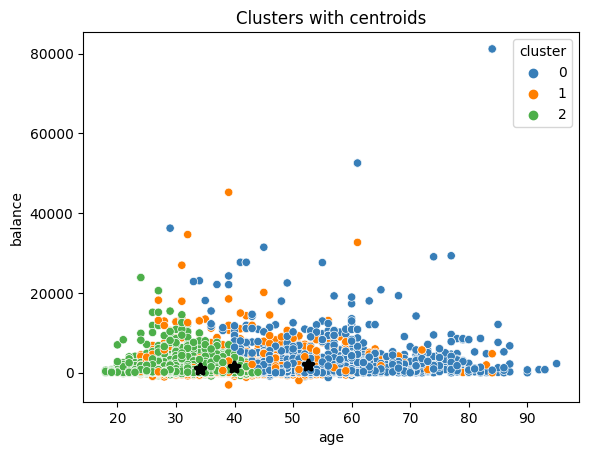

In [14]:
# visualize the clusters
sns.scatterplot(data=df_deposit, x='age', y='balance', hue='cluster', palette=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628'])
# Plot the centroids with darker and bigger markers
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50, linewidths=3, color='black', zorder=4)
plt.title("Clusters with centroids")
plt.show()

In [15]:
cluster0=df[['age', 'balance', 'deposit']][df['cluster']==0]
cluster1=df[['age', 'balance', 'deposit']][df['cluster']==1]
cluster2=df[['age', 'balance', 'deposit']][df['cluster']==2]
#cluster3=df[['age', 'balance', 'deposit']][df['cluster']==3]
#cluster4=df[['age', 'balance', 'deposit']][df['cluster']==4]

In [17]:
print(cluster0['deposit'].value_counts(normalize=True),cluster1['deposit'].value_counts(normalize=True),
     cluster2['deposit'].value_counts(normalize=True))

deposit
no     0.903315
yes    0.096685
Name: proportion, dtype: float64 deposit
no     0.540752
yes    0.459248
Name: proportion, dtype: float64 deposit
no     0.919113
yes    0.080887
Name: proportion, dtype: float64


In [192]:
cluster0.shape

(12945, 3)

In [193]:
cluster1.shape

(19690, 3)

In [194]:
cluster2.shape

(214, 3)

In [195]:
cluster3.shape

(2625, 3)

In [196]:
cluster4.shape

(7790, 3)

In [165]:
X = df['age']
Y = df['balance']

C:\Users\KARAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KARAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KARAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KARAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KARAN\anaconda3\lib\site-packages\sklearn\clust

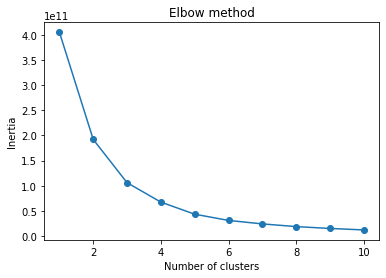

In [166]:
data=list(zip(X,Y))
inertias=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11),inertias,marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

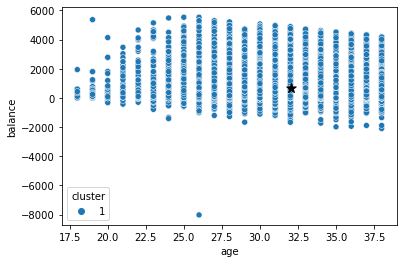

In [190]:
sns.scatterplot(data=df[df['cluster']==1], x='age', y='balance', hue='cluster')
# plot the centroids for each cluster

centroid = kmeans.cluster_centers_[1]
# reshape the centroid to a 2D array with a single row
centroid = np.reshape(centroid, (1, -1))

# pass the reshaped centroid to scaler.inverse_transform()
centroid = scaler.inverse_transform(centroid)

plt.scatter(centroid[0][0], centroid[0][1], s=100, marker='*', c='black')
plt.show()

In [189]:
centroid

array([[ 32.0299091 , 701.70344793]])

In [7]:
df1

,age,balance,month,duration,campaign,previous,age_group,job_admin,job_blue-collar,job_entrepreneur,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,balance_status_high,balance_status_low,balance_status_medium,balance_status_negative,balance_status_very high
0,58,2143,5,4.35,1,0,50,False,False,False,...,False,False,True,True,False,False,False,False,False,True
1,44,29,5,2.52,1,0,40,False,False,False,...,False,False,True,True,False,False,True,False,False,False
2,33,2,5,1.27,1,0,30,False,False,True,...,False,False,True,False,True,False,True,False,False,False
3,47,1506,5,1.53,1,0,40,False,True,False,...,False,False,True,True,False,True,False,False,False,False
4,33,1,5,3.30,1,0,30,False,False,False,...,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,51,825,11,16.28,3,0,50,False,False,False,...,False,True,False,True,False,True,False,False,False,False
43260,71,1729,11,7.60,2,0,70,False,False,False,...,False,True,False,True,False,True,False,False,False,False
43261,72,5715,11,18.78,5,3,70,False,False,False,...,False,True,False,True,False,False,False,False,False,True
43262,57,668,11,8.47,4,0,50,False,True,False,...,False,True,False,True,False,False,False,True,False,False


In [14]:
X = df1.copy()

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Initialize PCA and fit the data
pca = PCA()
pca.fit(X_std)

# Compute the amount of variance explained by each principal component
variance = pca.explained_variance_ratio_

# Get the column names from the original dataframe
col_names = X.columns

# Create a new dataframe to store the results
pca_results = pd.DataFrame({'Column Name': col_names,
                            'Variance Explained': variance})

pca_results['Variance Explained'] = round(pca_results['Variance Explained'],5)*100

# Print the results
print(pca_results)

                 Column Name  Variance Explained
0                        age               8.688
1                    balance               7.398
2                      month               6.077
3                   duration               5.420
4                   campaign               5.066
5                   previous               4.649
6                  age_group               4.256
7                  job_admin               3.970
8            job_blue-collar               3.526
9           job_entrepreneur               3.382
10             job_housemaid               3.256
11            job_management               3.181
12                 job_other               3.105
13               job_retired               3.013
14         job_self-employed               2.896
15              job_services               2.847
16               job_student               2.826
17            job_technician               2.811
18            job_unemployed               2.762
19          marital_

In [16]:
a=pca_results[:14]['Column Name'].tolist()

In [17]:
df2 = df1[a]

In [18]:
df2

,age,balance,month,duration,campaign,previous,age_group,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired
0,58,2143,5,4.35,1,0,50,0,0,0,0,1,0,0
1,44,29,5,2.52,1,0,40,0,0,0,0,0,0,0
2,33,2,5,1.27,1,0,30,0,0,1,0,0,0,0
3,47,1506,5,1.53,1,0,40,0,1,0,0,0,0,0
4,33,1,5,3.30,1,0,30,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,51,825,11,16.28,3,0,50,0,0,0,0,0,0,0
43260,71,1729,11,7.60,2,0,70,0,0,0,0,0,0,1
43261,72,5715,11,18.78,5,3,70,0,0,0,0,0,0,1
43262,57,668,11,8.47,4,0,50,0,1,0,0,0,0,0


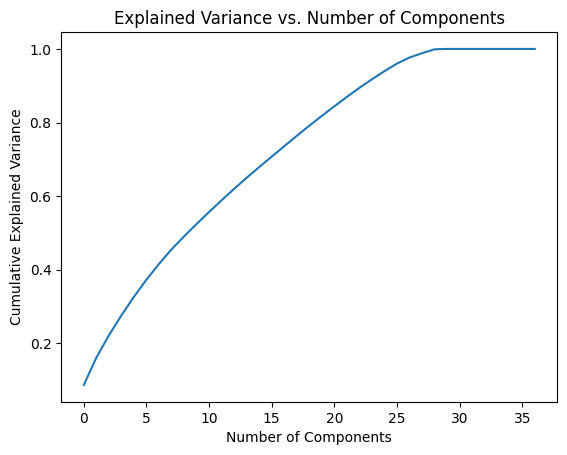

In [19]:
# Obtain the explained variance ratios
variance_ratios = pca.explained_variance_ratio_

# Obtain the cumulative sums of these ratios
cumulative_variance = np.cumsum(variance_ratios)

# Plot the cumulative sums against the number of components
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

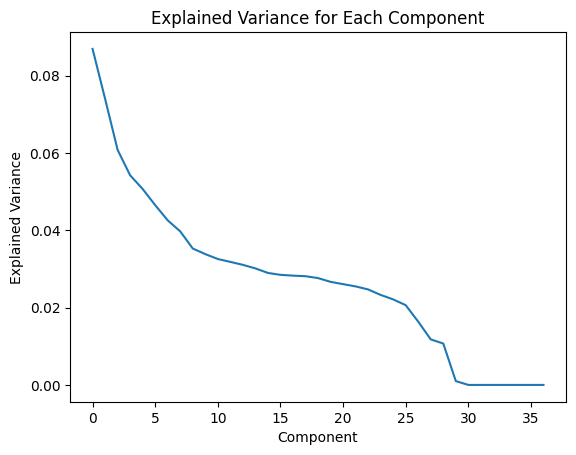

In [20]:
# Obtain the explained variances for each component
variances = pca.explained_variance_ratio_

# Plot the variances for each component
plt.plot(variances)
plt.xlabel('Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for Each Component')
plt.show()

In [40]:
# obtain the covariance matrix used for PCA
covariance_matrix = pca.get_covariance()

In [45]:
print(covariance_matrix)

[[ 1.00002311  0.0979832   0.09436993 ... -0.04237311 -0.01035652
   0.11241344]
 [ 0.0979832   1.00002311  0.09507487 ... -0.14765055 -0.21932972
   0.62470674]
 [ 0.09436993  0.09507487  1.00002311 ... -0.06696232  0.00118067
   0.10921216]
 ...
 [-0.04237311 -0.14765055 -0.06696232 ...  1.00002311 -0.21861628
  -0.24974214]
 [-0.01035652 -0.21932972  0.00118067 ... -0.21861628  1.00002311
  -0.21879016]
 [ 0.11241344  0.62470674  0.10921216 ... -0.24974214 -0.21879016
   1.00002311]]
